# Accounting for Expert Knowledge

* An Introduction to Differential Equations
    * Simple Population Models
    * Spring Models
    * SEIRS Models
* A review of Statistical Learning Algorithms
    * Newton's Method
    * Stochastic Gradient Descent
    * linear programming
* Combining Physical Models with Statistical Models
    * A review of ensembling methods
* Statistical Models with Extra Structure
    * Probabilistic Graphical Models
    * Mixed Effects Models
    * Hierarchical Bayesian Models

## An Introduction to Differential Equations

Up until this point we've assumed, at least implicitly that you need tons of data to build a model.  However, it is possible to build a model of the world with very limited data, assuming you know some things.  First we'll look at differential equations - which is used to write down mathematical models.  Specifically, with very limited data we can get a precise view of certain systems.  These systems have specific requirements though:

1. We need to understand all of the "states" of the system

Typically this means we are dealing with physical systems, where we can enumerate all the states of the model.  If the model has a hidden or unknown state, a model using differential equations is potentially ill-advised.

2. We need to have realistic assumptions about our system

This requirement basically states that our assumptions are realistic and by writing them down mathematically we will get a reasonable functional form for our system.

3. We know all of the major variables that will interact together in our system

This requirement says that we can measure everything of interest and ultimately we can capture the phenomenon we are interested through observations or assumptions.  This is another reason why differential equations is typically used with physical systems.  In this case, it's very unlikely that anything is "hidden" or difficult to observe.  You can know or understand everything about your system, simply by gathering observations or other similar activities.

4. Our system varies in some way with time

In general the procedure we are going to use to generate a differential equation could be used to write down any system that is well modeled explicitly with mathematics.  But the main difference between any old model and a model involving differential equations is dynamics.  Specifically a differential equation assumes you are working with a system that changes in some way over time.

### A General Procedure For Creating A Differential Equation

Once you are sure a differential equation is appropriate for your model then the following set of steps can help guide you in figuring out exactly how your differential equation or equations ought to look:

Step 1. Clearly state the assumptions on which the model will be based.  These assumptions should describe the relationships among the quantities to be studied.

Step 2. Completely describe the variables and parameters to be used in the model.  This is why you need a full understanding of the system.  If some of the variables are implicit or unobservable directly then a differential equation is not appropriate.

Step 3. Use the assumptions formulated in Step 1 to derive equations relating to the quantities in Step 2.

### A First Example

Suppose you were interested in predicting the population of a certain bacteria after a number of hours.  In order to understand the population growth in general, we need a model of the growth of this population.  

Step 1: Write out your assumptions:

* We assume the population is unbounded.  That is, there is no maximum size that the population can grow to, so it grows forever.

* The population has unlimited access to food.  That is, we never need to worry about the food supply of the bacteria disappearing because it is easy to keep adding more.  Therefore the population is also not bounded by food supply.

* The population has an infinite area to grow within.  Specifically, the population won't be constrained by any area we house it in because bacteria are so small.

Step 2: State your variables and parameters:

* let t = time, our independent variable

* let P = population, our dependent variable

* let k = proportionality constant between the rate of growth of the population and the size of the population.

* let $\frac{dP}{dt}$ = the derivative of the population with respect to time.  

Step 3: Write down your differential equation

$$ \frac{dP}{dt} = k*P $$

What the equation says is:

"The rate of change of our population is equation to the current population times some proportionality constant".  In other words, our population's growth rate is proportional to it's current population, at some time, t.

So are we done?  Well almost.  Now comes the "tricky" part.  This is where most of the technical "mathematics" comes into play.  Now that we have a reasonable mental model for how our population grows, we need an explicit functional form, so that we can do prediction.  Specifically, we are interested in knowing our population with respect to time, in other words, we are interested in $P(t)$.  

Up until now we haven't explicitly stated that our population was a function of time, but we did hint at it in several places.  First we called P a dependent variable, meaning it depends on t.  Secondly, we called t an independent variable, so there is no function that defines t.  And since P depends on t, another way of saying that is, $P(t)$.  

So now that we've settled on P being a function of time, we need to figure out the exact functional form of $P(t)$.  It's worth noting, before we figure out the functional form in this case, it's sometimes impossible to write down a functional form.  That is to say, there may be no analytic solution for a given differential equation, no precise functional form.  For that, we'll turn to statistical models.  Because even if we can't capture a system due it's level of complexity, as long as we have instruments to measure it carefully, and we understand the variables of the system correctly, we can still capture it's approximate functional form statistically.  We'll see more of this later on in the capture.  Of course you could look at any of the other chapters for examples of purely statistical models if the statistical models presented here don't seem useful for the problem you are trying to solve.

Alright, so back to our problem at hand:

We know that:

$$ \frac{dP}{dt} = k * P(t) $$

This means we need a function whose derivative is itself, times a constant.  Given the trivial nature of this function, and assuming you know calculus, the answer is obvious.  In order to figure out the general functional form, we need only do a quick pattern match.

The answer is obvious, it's $e^{a*x}$.  That's because:

$$ f(x) = e^{a*x} $$
$$ f'(x) = a*e^{a*x} $$

So!  If we take the derivative of $e^{a*x}$ we get back itself times a constant, in this case $a$.  Which is exactly what we wanted!!!

If we want to be more specific about our prediction from here, we need only know how many bacteria we started with at time t=0 and then some later values of t.  We could then use that to figure out the exact starting value of k as well as the coefficient associated with the power of e.  That is, our exact functional form would look like this:

$$ \frac{dP}{dt} = P_{0}*e^{a*t} $$

Could we have used any base to the power of x to do this?  The answer turns out to be yes!  In particular:

$$ f(x) = a^{x} $$
$$ f'(x) = ln(a) * a^{x} $$

And $ln(a)$ is still a constant, so _any_ base could have worked!  Specifically the general form of our "solution space" is:

$$ \frac{dP}{dt} = P_{0}*b^{a*t} $$

Where $b$ is some constant.

This points to a more general fact - differential equations can have "families" of solutions.  Picking the correct constant can be the hardest part.  Since it is so difficult, we'll actually pass this part of our solution off to the computer.

## Parameter estimation

In general there are a few ways to do parameter estimation:

1. Review the literature for agreed upon values

For instance, let's say we wanted to use gravity as a constant in our equations for some physics related equation on earth.  Then we can probably just make use of the "agreed upon" value for the gravitational constant: `9.807 m/s²`.  The scientific literature will often have the values for many useful constants that are widely used in the physical sciences.  So we can just look them up.  Of course, this method is naive.  For precise calculations we may need to actually _estimate_ these constants.  For instance, gravity on earth is not _actually_ constant.  It doesn't vary much, but it does vary.  And for some precise physical systems that minor variance matters _a lot_.  

This brings us to our second method:

2. Gather some data and then "fit" a model with those parameters.

Everything we did above was about coming up with a general structural form for our mathematical description of a process.  However, since some of the constants aren't known in general, we leave them as variables.  Estimating those parameters is how we make the model useful.  Even if you are 100% sure of the mathematical form of your model, if your parameters are bad, then the model will be bad.

### Fitting a Model

Since literature review won't work for our example, we'll have to fit a model.  In order to do that first we typically need to collect some data.  For this first example, we'll just fake some data.  Once we've got our data, then we need to go about estimating our parameters.  For this we'll need a loss function.  The loss function tells us how far off we are in general.  We could also plot a graph of the predictions against the actual values.  Or we could plot the residuals, that is, the difference between the predictions and the actual values.  Finally, we'll need some way of guessing parameters to try.  Once we have all those three pieces, we'll be able to "fit" a model.  So to recap our steps are:

1. Obtain some data
2. Define a loss function
3. Decide on a way to search for parameters

### Obtain Some Data

In general there are data sources for anything you might like on the internet.  If you are looking for data I can recommend looking in the following places:

* https://www.kaggle.com/datasets
* https://data.world/
* https://github.com/awesomedata/awesome-public-datasets

If you can't find what you are looking for after searching through all of that, it may not exist.  

For our purposes, we are just going to generate some data from some known distributions since this is a worked first example.  Since we agreed ahead of time this should have an exponential functional form, let's start there:

In [48]:
import numpy as np

def generate_data(size: int) -> np.array:
    """
    A data generation process based on a random set of parameters.
    The general functional form of our solution is exponential.
    We also assume that our population will strictly increase with time.
    
    Our random parameters are:
    * base
    * initial population
    * alpha
    * error
    
    And our general functional form is:
    
    $$P_{0} * base^{alpha*time} + error$$
    
    Parameters
    ----------
    size : int - the number of time steps to generate.
    Each time step represents 1 hour.
    
    Returns
    --------
    A numpy array of all the realized values for the random process
    with the aboved general functional form.
    """
    initial_population = abs(np.random.normal(200, 150))
    base = abs(np.random.normal(2, 0.5))
    alpha = abs(np.random.normal(2, 1.5))
    return np.array([
        (initial_population * (base**(alpha*time))) + np.random.normal(50, 200)
        for time in range(size)
    ])

data = generate_data(100)

As you can see we are able to generate data points fairly easily.  Let's go ahead and plot our result to see what the data looks like:

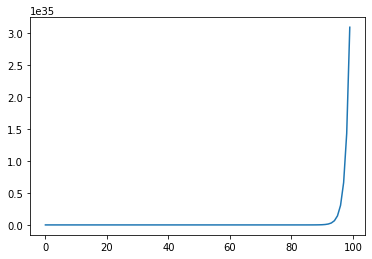

In [49]:
import matplotlib.pyplot as plt

plt.plot(range(100), data)

As expected from an exponential functional form, the data "explodes" to a very high value as we move forward in time.  This should be unsurprising since we assume monotonic population growth.

### Define a Loss Function

Now that we have something to try and fit, our next step is to come up with a method for figuring out how far away our model is from our observed values.  This is crucial because, in general we don't know the mathematical formulation of the data generation process.  

In general our loss function should be point statistic for a collection of distance measures.  So if we care primarily about closeness to the trend of a process, then we probably want a measure of centrality.  If we care about the maximum range of possible values, but a particular estimate only needs to be within a range, then we probably want a measure of spread.  For completeness I'll list out some distance functions, measures of centrality and measures of spread:

Distance functions:

* Euclidean:

$$ \sqrt{\sum_{i=0}^{i=N} (p_{i} - q_{i})^{2}} $$

* Manhattan:

$$ \sum_{i=0}^{i=N} | p_{i} - q_{i} | $$

* Minkowski

$$ (\sum_{i=0}^{i=N} | p_{i} - q_{i} |^{h})^{1/h} $$

Measures of Centrality:

* Mean
* Median
* Trimean

For more complete list of central tendencies I recommend checking out:

* [https://en.wikipedia.org/wiki/Central_tendency](https://en.wikipedia.org/wiki/Central_tendency)

Measures of Spread:

* Variance
* Standard Deviation
* Interquartile Range

For a more complete list of measures of spread I recommend checking out:

* [https://en.wikipedia.org/wiki/Statistical_dispersion](https://en.wikipedia.org/wiki/Statistical_dispersion)

Since we are interested in a measure of precision for this example, we'll just go with the euclidean distance and the simple mean:

$$ \sum_{i=0}^{i=N} \frac{(p_{i} - q_{i})^{2}}{N} $$

Notice how the two concepts come together:

The notion of difference comes directly from our distance metric - subtraction and squaring.  And we use the formula for the simple average around that differencing.  

Notice that because we don't take a square root, differences that are large will be over stated and differences that are less than 1 will be understated.  This is by design for this loss function.  If these traits were not desireable we could always take a square root after averaging, to recover a "true" euclidean distance.

In [63]:
import numpy as np

def mean_squared_error(actual: np.array, predicted: np.array) -> float:
    """
    The mean squared error is a measure of 
    the average error of two sequences of data.
    
    It is designed by using the euclidean distance and the
    simple mean:
    
    $$ \sum_{i=0}^{i=N} \frac{(p_{i} - q_{i})^{2}}{N} $$
    """
    squared_difference = (actual - predicted) ** 2 
    return sum(squared_difference)/len(actual)
    
first = np.arange(0, 15, 0.1)
second = np.arange(15, 0, -0.1)

print("completely different sequences", mean_squared_error(first, second))

first = np.random.normal(0, 1, size=1000)
second = np.random.normal(0, 1, size=1000)

print("similar sequences", mean_squared_error(first, second))

completely different sequences 75.00666666666642
similar sequences 2.0677030264267606


Our error measure seems to tell us something reasonable:

* if the data is very different, per value in the sequence on average, the loss is large.
* if the data is very similar, per value in the sequence on average, the loss is small.

Next let's see if the length of sequence being compared matters:

In [66]:
def mean(arr):
    return sum(arr)/len(arr)

count_long_larger = 0
deviances = []
size = 10000
for _ in range(size):
    long_first = np.random.normal(0, 1, size=1000)
    long_second = np.random.normal(0, 1, size=1000)

    short_first = np.random.normal(0, 1, size=100)
    short_second = np.random.normal(0, 1, size=100)

    long_error = mean_squared_error(long_first, long_second)
    short_error = mean_squared_error(short_first, short_second)
    
    if long_error > short_error:
        count_long_larger += 1
        
    deviances.append(long_error - short_error)
    

print(f"Longer sequences have more error than short sequences {count_long_larger} out of {size}")
print(f"The average deviance was {mean(deviances)}")

Longer sequences have more error than short sequences 5080 out of 10000
The average deviance was -0.005559081523059284


Based on the above "back of the envelope calculation" it looks like the length of the sequence alone is not enough to induce additional variance.  Therefore, this measure shouldn't be larger as a function of the size of our sequence.  Which is certainly a desirable trait.  

### Decide on a way to search for parameters

Now that we can tell when we are wrong and we have some data to train against, the final thing we need is a way to search for parameters.  The most naive thing to do is just search some space via iterating over a full range of values.  So let's try that first:

In [82]:
from itertools import product

def generate_data(size: int) -> np.array:
    """
    A data generation process based on a random set of parameters.
    The general functional form of our solution is exponential.
    We also assume that our population will strictly increase with time.
    
    Our random parameters are:
    * base
    * initial population
    * alpha
    * error
    
    And our general functional form is:
    
    $$P_{0} * base^{alpha*time} + error$$
    
    Parameters
    ----------
    size : int - the number of time steps to generate.
    Each time step represents 1 hour.
    
    Returns
    --------
    A numpy array of all the realized values for the random process
    with the aboved general functional form.
    """
    initial_population = abs(np.random.normal(200, 150))
    base = abs(np.random.normal(2, 0.5))
    alpha = abs(np.random.normal(2, 1.5))
    return np.array([
        (initial_population * (base**(alpha*time))) + np.random.normal(50, 200)
        for time in range(size)
    ])

def mean_squared_error(actual: np.array, predicted: np.array) -> float:
    """
    The mean squared error is a measure of 
    the average error of two sequences of data.
    
    It is designed by using the euclidean distance and the
    simple mean:
    
    $$ \sum_{i=0}^{i=N} \frac{(p_{i} - q_{i})^{2}}{N} $$
    """
    squared_difference = (actual - predicted) ** 2 
    return sum(squared_difference)/len(actual)

def search_parameters(model, parameter_ranges, data):
    losses = []
    parameter_enumerations = []
    for parameter_range in parameter_ranges:
        parameter_enumerations.append(
            np.arange(*parameter_range)
        )
    params = list(
        product(*parameter_enumerations)
    )
    for i in range(len(params)):
        losses.append({
                "mse": mean_squared_error(data, model(*params[i])),
                "params": params[i]
            })
    return losses
        
def select_best_model(losses):
    mses = [(i, losses[i]["mse"]) for i in range(len(losses))]
    mses = sorted(mses, key=lambda t: t[1])
    best_loss_index = mses[0][0]
    return losses[best_loss_index]

def model(initial_population, base, alpha, size=100):
    return np.array([
        (initial_population * (base**(alpha*time)))
        for time in range(size)
    ])

data = generate_data(100)
parameter_ranges = [
    (25, 500, 10), # initial population guess range
    (0, 5, 0.1), # base guess range
    (0, 10, 0.1) # alpha guess range
]
losses = search_parameters(model, parameter_ranges, data)
best_model = select_best_model(losses)
print(f"The model with the best parameters had a loss of: {best_model['mse']}")
print(f"The parameters were: {best_model['params']}")

/home/eric/.local/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in square
/home/eric/.local/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: overflow encountered in double_scalars
/home/eric/.local/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: overflow encountered in multiply


The model with the best parameters had a loss of: 12274121.116730185
The parameters were: (35, 1.6, 0.2)


One might be tempted to draw conclusions from how poor our model does (this the best my loss got after several attempts and some fiddling with the size of the search space), but that would be ill advised.  Our hyper parameter search was _incredibly_ naive.  One lesson that is reasonable to take away from this is that exponentials are incredibly sensitive to hyper parameters.  So one should only use such a model in practice if one is sure that some other model cannot be used first.  For instance sigmoid functions, which locally approximate exponentials but trial off above or below a given value are a very good substitute.  

Leaving the particulars of this example behind we sketched out for the first time a general pattern for doing modeling:

1. obtain data
2. decide on a loss function
3. search for appropriate parameters.  

This is more or less the general form for doing modeling against the solution space of differential equations.  Of course, as we've seen in other chapters, this is similar to the procedure used with purely statistical models.



Aside - consider hidden state discovery if there are a range of parameters where the diffEQ model massively "misbehaves".  So if there is some range where our model is just "wrong", rely solely on the statistical model.

Aside - consider a statistical approach to "picking the constants" from a family of differential equations.